In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [258]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [259]:
df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [261]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

We can drop the bpay_biller_code and merchant code columns as it has a lot of missing values
#card_present_flag has missing values we can drop this column as well
We can drop account as the same information is available from customer_id,
currency and country can be dropped since they have just one value across the dataset

We will also drop merchant_suburb and merchant_long_lat and first name


In [262]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [263]:
drop_cols=['card_present_flag', 'bpay_biller_code', 'account','currency','merchant_code',
           'first_name','country','merchant_long_lat']
df=df.drop(columns=drop_cols)

## Finding the salary

In [264]:
df[df['movement']=='credit'].txn_description.unique()
## so all the credit transactions are payments

array(['PAY/SALARY'], dtype=object)

In [265]:
df.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


In [266]:
sal_df=pd.DataFrame(df['customer_id'].unique(), columns=['customer_id'])

In [267]:
sal_df.head()

,customer_id
0,CUS-2487424745
1,CUS-2142601169
2,CUS-1614226872
3,CUS-2688605418
4,CUS-4123612273


In [268]:
df['month']=df['date'].dt.month

In [269]:
## we find the various salary transactions and sum them over each month
##assuming salary to be constant across the observed period, we take the mode over the 3 months as the monthly salary
df1=df[df['movement']=='credit']
X=df1.groupby(['customer_id','month']).sum()['amount']

sal=[]
for cust in sal_df['customer_id']:
    sal.append(X[cust].mode()[0])

sal_df['salary']=sal
#multiply by 12 to get annual salary
sal_df['salary']=sal_df['salary']*12

In [270]:
sal_df.head()

,customer_id,salary
0,CUS-2487424745,60820.20
1,CUS-2142601169,48102.24
2,CUS-1614226872,42820.32
3,CUS-2688605418,55687.20
4,CUS-4123612273,64082.40


<AxesSubplot:xlabel='salary', ylabel='Count'>

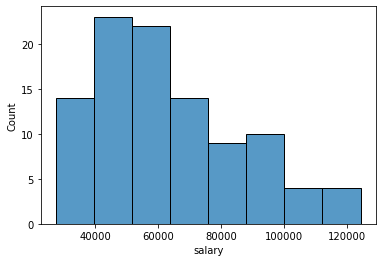

In [271]:
sns.histplot(sal_df.salary)

# Extracting the features

In [272]:
df=df[df['movement']=='debit']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11160 entries, 0 to 12042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   status           11160 non-null  object        
 1   long_lat         11160 non-null  object        
 2   txn_description  11160 non-null  object        
 3   merchant_id      7717 non-null   object        
 4   balance          11160 non-null  float64       
 5   date             11160 non-null  datetime64[ns]
 6   gender           11160 non-null  object        
 7   age              11160 non-null  int64         
 8   merchant_suburb  7717 non-null   object        
 9   merchant_state   7717 non-null   object        
 10  extraction       11160 non-null  object        
 11  amount           11160 non-null  float64       
 12  transaction_id   11160 non-null  object        
 13  customer_id      11160 non-null  object        
 14  movement         11160 non-null  objec

We will extract the following features
1. long_lat: find the longitude and latitude (use k_means?)
2. balance: find the average balance
3. gender
4. age
5. state: assume the state where most transactions occur. for missing values use the most common state
6. amount: find average and max transactions amounts
7. find the number of transaction per week

In [273]:
df['extraction']=df.apply(lambda x:datetime.strptime(x['extraction'], "%Y-%m-%dT%H:%M:%S.000+0000"), axis=1)
df['week']=df['extraction'].dt.isocalendar().week
#finding the week so we can find weekly averages

# we want to fill the missing merchant state using the most frequent state
df['merchant_state']=df['merchant_state'].fillna(df['merchant_state'].mode()[0])

In [274]:
#finding the longitude and latitude
#long=[]
#lat=[]
#X=df.groupby('customer_id')['long_lat'].first()
#for cust in sal_df['customer_id']:
#    long.append(X[cust].split('-')[0])
#    lat.append(X[cust].split('-')[1])
    
#sal_df['long']=long
#sal_df['lat']=lat

In [275]:
bal=[]
X=df.groupby('customer_id')['balance'].mean()
for cust in sal_df['customer_id']:
    bal.append(X[cust])
    
sal_df['balance']=bal



In [276]:
#finding the age
age=[]
X=df.groupby('customer_id')['age'].first()
for cust in sal_df['customer_id']:
    age.append(X[cust])
    
sal_df['age']=age

In [277]:
#finding the gender
gender=[]
X=df.groupby('customer_id')['gender'].first()
for cust in sal_df['customer_id']:
    gender.append(X[cust])
    
sal_df['gender']=gender

In [278]:
#finding the state
state=[]
X=df.groupby('customer_id')['merchant_state'].agg(pd.Series.mode)
for cust in sal_df['customer_id']:
    if type(X[cust])==str:
        state.append(X[cust])
    else:
        state.append(X[cust][0])
    
sal_df['state']=state

In [279]:
#maximum and average transaction amounts
X=df.groupby('customer_id')['amount']
X_max=X.max()
X_avg=X.mean()
max_txn=[]
avg_txn=[]
for cust in sal_df['customer_id']:
    max_txn.append(X_max[cust])
    avg_txn.append(X_avg[cust])

sal_df['max_txn']=max_txn
sal_df['avg_txn']=avg_txn

In [280]:
X=df.groupby(['customer_id', 'week']).count()['status']
txn_per_week=[]
for cust in sal_df['customer_id']:
    txn_per_week.append(X[cust].mean())
    
sal_df['txn_per_week']=txn_per_week

In [281]:
sal_df.head()

,customer_id,salary,balance,age,gender,state,max_txn,avg_txn,txn_per_week
0,CUS-2487424745,60820.20,1725.063759,26,F,QLD,1452.21,21.312429,40.285714
1,CUS-2142601169,48102.24,1165.981724,38,M,NSW,2349.55,36.788828,20.714286
2,CUS-1614226872,42820.32,3298.238780,40,F,QLD,235.36,31.257195,17.571429
3,CUS-2688605418,55687.20,5534.418618,20,M,NSW,788.00,53.889756,8.785714
4,CUS-4123612273,64082.40,5210.560250,43,F,VIC,760.27,61.329667,8.571429


# Interaction with salary

In [282]:
#plt.figure(figsize=(10,10))
#sns.scatterplot(x='long', y='lat', size=sal_df['salary']*sal_df['salary'], data=sal_df)
#doesnt seem like this has any relation with salary

C:\Users\Apaala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='salary'>

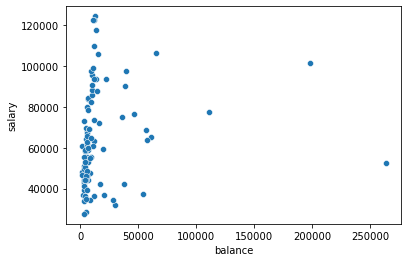

In [283]:
sns.scatterplot('balance','salary',data=sal_df)

C:\Users\Apaala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='salary'>

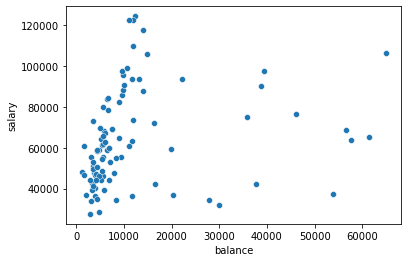

In [284]:
##we drop the outliers
sal_df=sal_df[sal_df['balance']<100000]
sns.scatterplot('balance','salary',data=sal_df)

C:\Users\Apaala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Apaala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Apaala\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Apaala\ana

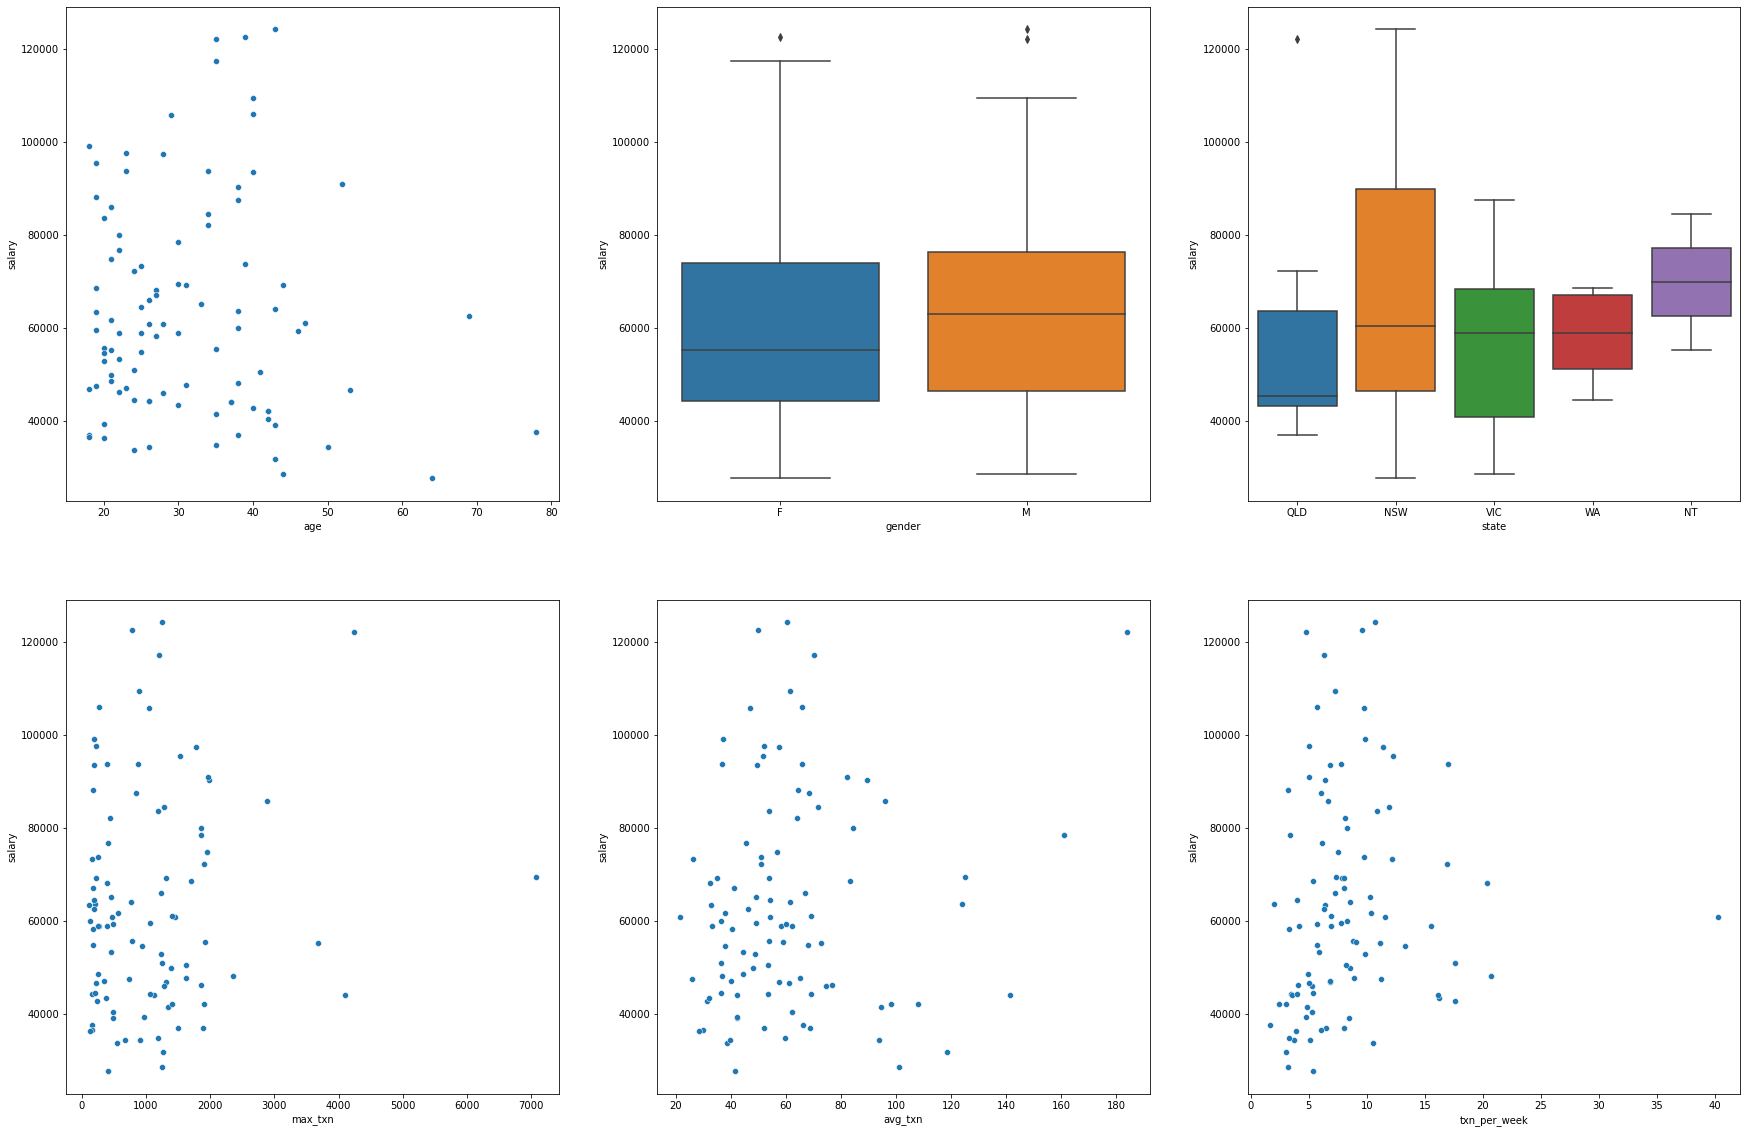

In [285]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(30,20));
sns.scatterplot('age','salary',data=sal_df, ax=axs[0][0]);
sns.boxplot(x='gender',y='salary', data=sal_df, ax=axs[0][1]);
sns.boxplot(x='state',y='salary', data=sal_df,ax=axs[0][2]);
sns.scatterplot('max_txn','salary',data=sal_df,ax=axs[1][0]);
sns.scatterplot('avg_txn','salary',data=sal_df,ax=axs[1][1]);
sns.scatterplot('txn_per_week','salary',data=sal_df,ax=axs[1][2]);

<AxesSubplot:>

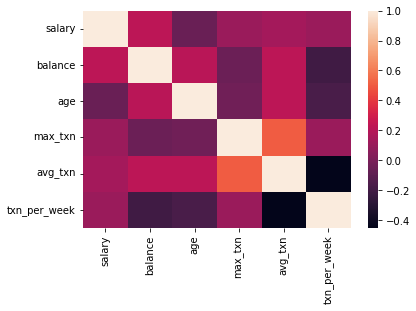

In [286]:
cor=sal_df.corr()
sns.heatmap(cor)

In [287]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
sal_df['gender']=le1.fit_transform(sal_df['gender'])
le2=LabelEncoder()
sal_df['state']=le2.fit_transform(sal_df['state'])

In [288]:
from sklearn.model_selection import train_test_split
X=sal_df.drop(columns=['salary'])
y=sal_df['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Model

In [289]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train.drop(columns=['customer_id']),y_train)

LinearRegression()

In [290]:
y_pred=model1.predict(X_test.drop(columns=['customer_id']))

In [292]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test,squared=False))

26578.868526719707


# Tree Based Model

In [293]:
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor()
model2.fit(X_train.drop(columns=['customer_id']),y_train)

DecisionTreeRegressor()

In [294]:
y_pred=model2.predict(X_test.drop(columns=['customer_id']))
print(mean_squared_error(y_pred,y_test,squared=False))

22981.421346863644


In [296]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train.drop(columns=['customer_id']),y_train)

y_pred=model3.predict(X_test.drop(columns=['customer_id']))
print(mean_squared_error(y_pred,y_test,squared=False))

18171.917017920572
